In [1]:
from google.colab import drive  # to mount Drive to Colab notebook
import csv
import time
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
def train(X,y):
  modelo = Perceptron(tol=1e-3, random_state=0, verbose=2)
  step = 5000
  for i in range(0,len(X),step):
    modelo.partial_fit(X[i:i+step],y[i:i+step],classes=["fake","noFake"])
    if i%1000==0:
      print(f'Avance: {(i+1)*100/X.shape[0]} %')
  
  return modelo

# Cargamos muestras

## Muestra 1


In [ ]:
from sklearn.externals import joblib
%time X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 6.68 s, sys: 65.3 ms, total: 6.74 s
Wall time: 9.62 s
CPU times: user 6.72 s, sys: 46.2 ms, total: 6.77 s
Wall time: 7.42 s
CPU times: user 8.75 ms, sys: 1.99 ms, total: 10.7 ms
Wall time: 545 ms
CPU times: user 4.75 ms, sys: 218 µs, total: 4.97 ms
Wall time: 466 ms


In [ ]:
%time modelo1 = train(X1_train,y1_train)


-- Epoch 1
Norm: 38.00, NNZs: 4540, Bias: 0.000000, T: 5000, Avg. loss: 0.162963
Total training time: 0.22 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 48.48, NNZs: 5974, Bias: 0.000000, T: 5000, Avg. loss: 0.129748
Total training time: 0.21 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 55.09, NNZs: 6958, Bias: -1.000000, T: 5000, Avg. loss: 0.127875
Total training time: 0.21 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 60.85, NNZs: 7718, Bias: 0.000000, T: 5000, Avg. loss: 0.115718
Total training time: 0.19 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 65.58, NNZs: 8355, Bias: 0.000000, T: 5000, Avg. loss: 0.114036
Total training time: 0.20 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 70.17, NNZs: 8966, Bias: 0.000000, T: 5000, Avg. loss: 0.128288
Total training time: 0.20 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 74.06, NNZs: 9427, Bias: -1.000000, T: 5000, Avg. loss: 0.112572
Total training time: 0.20 seconds.
Avance: 40.7

In [ ]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m1.joblib']

In [ ]:
%time predictions1 = modelo1.predict(X1_test)

CPU times: user 2.25 s, sys: 683 ms, total: 2.94 s
Wall time: 2.28 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y1_test, predictions1)
print(f"acc: {accuracy_score(y1_test,predictions1)}")
print(f"precision: {precision_score(y1_test,predictions1,average='macro')}")
print(f"recall: {recall_score(y1_test,predictions1,average='macro')}")
print(f"f1: {f1_score(y1_test,predictions1,average='micro')}")

acc: 0.85743283960798
precision: 0.8583683816393088
recall: 0.8703478713631185
f1: 0.85743283960798


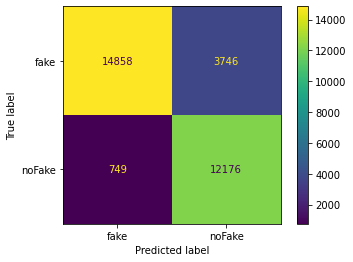

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 2


In [ ]:
from sklearn.externals import joblib
%time X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

CPU times: user 6.71 s, sys: 56.8 ms, total: 6.77 s
Wall time: 7.63 s
CPU times: user 6.52 s, sys: 57.6 ms, total: 6.58 s
Wall time: 7.26 s
CPU times: user 7.7 ms, sys: 3.01 ms, total: 10.7 ms
Wall time: 567 ms
CPU times: user 5.17 ms, sys: 7 µs, total: 5.18 ms
Wall time: 514 ms


In [ ]:
%time modelo2 = train(X2_train,y2_train)


-- Epoch 1
Norm: 37.95, NNZs: 4537, Bias: -1.000000, T: 5000, Avg. loss: 0.159878
Total training time: 0.23 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 48.79, NNZs: 6032, Bias: 0.000000, T: 5000, Avg. loss: 0.128153
Total training time: 0.21 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 55.91, NNZs: 7013, Bias: -1.000000, T: 5000, Avg. loss: 0.121790
Total training time: 0.20 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 61.89, NNZs: 7729, Bias: 0.000000, T: 5000, Avg. loss: 0.115681
Total training time: 0.20 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 67.09, NNZs: 8410, Bias: 0.000000, T: 5000, Avg. loss: 0.105331
Total training time: 0.19 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 71.33, NNZs: 8933, Bias: 0.000000, T: 5000, Avg. loss: 0.112979
Total training time: 0.19 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 74.93, NNZs: 9365, Bias: -1.000000, T: 5000, Avg. loss: 0.105417
Total training time: 0.20 seconds.
Avance: 40.

In [ ]:
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m2.joblib']

In [ ]:
%time predictions2 = modelo2.predict(X2_test)

CPU times: user 2.61 s, sys: 74.8 ms, total: 2.69 s
Wall time: 2.02 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y2_test, predictions2)
print(f"acc: {accuracy_score(y2_test,predictions2)}")
print(f"precision: {precision_score(y2_test,predictions2,average='macro')}")
print(f"recall: {recall_score(y2_test,predictions2,average='macro')}")
print(f"f1: {f1_score(y2_test,predictions2,average='micro')}")

acc: 0.7932062545592946
precision: 0.8598989610142027
recall: 0.7496650332471502
f1: 0.7932062545592946


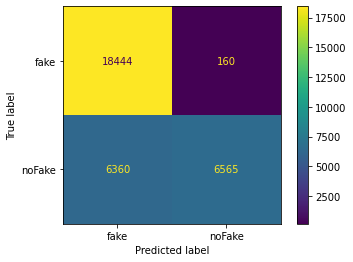

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 3


In [ ]:
from sklearn.externals import joblib
%time X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 6.63 s, sys: 67.5 ms, total: 6.7 s
Wall time: 7.39 s
CPU times: user 6.75 s, sys: 60.9 ms, total: 6.81 s
Wall time: 7.83 s
CPU times: user 7.46 ms, sys: 985 µs, total: 8.45 ms
Wall time: 563 ms
CPU times: user 5.83 ms, sys: 63 µs, total: 5.89 ms
Wall time: 533 ms


In [ ]:
%time modelo3 = train(X3_train,y3_train)


-- Epoch 1
Norm: 38.47, NNZs: 4554, Bias: -1.000000, T: 5000, Avg. loss: 0.155624
Total training time: 0.23 seconds.
Avance: 0.0013593051232210095 %
-- Epoch 1
Norm: 48.88, NNZs: 5991, Bias: -1.000000, T: 5000, Avg. loss: 0.130042
Total training time: 0.21 seconds.
Avance: 6.797884921228268 %
-- Epoch 1
Norm: 55.55, NNZs: 6948, Bias: 0.000000, T: 5000, Avg. loss: 0.111405
Total training time: 0.20 seconds.
Avance: 13.594410537333316 %
-- Epoch 1
Norm: 61.59, NNZs: 7810, Bias: 0.000000, T: 5000, Avg. loss: 0.116438
Total training time: 0.21 seconds.
Avance: 20.39093615343836 %
-- Epoch 1
Norm: 66.41, NNZs: 8436, Bias: -1.000000, T: 5000, Avg. loss: 0.114087
Total training time: 0.20 seconds.
Avance: 27.18746176954341 %
-- Epoch 1
Norm: 70.20, NNZs: 8985, Bias: 0.000000, T: 5000, Avg. loss: 0.113175
Total training time: 0.20 seconds.
Avance: 33.983987385648454 %
-- Epoch 1
Norm: 74.14, NNZs: 9455, Bias: 0.000000, T: 5000, Avg. loss: 0.105939
Total training time: 0.20 seconds.
Avance: 40.

In [ ]:
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m3.joblib']

In [ ]:
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 2.63 s, sys: 66 ms, total: 2.69 s
Wall time: 2.03 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {accuracy_score(y3_test,predictions3)}")
print(f"precision: {precision_score(y3_test,predictions3,average='macro')}")
print(f"recall: {recall_score(y3_test,predictions3,average='macro')}")
print(f"f1: {f1_score(y3_test,predictions3,average='micro')}")

acc: 0.8542294395635764
precision: 0.8570526608448679
recall: 0.8687316177923095
f1: 0.8542294395635764


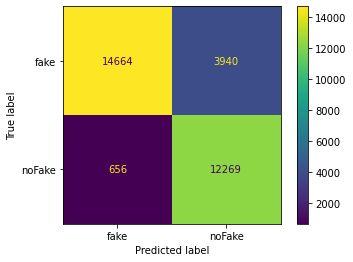

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res3,display_labels=['fake','noFake']).plot(values_format='d')

In [ ]:
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m1.joblib')
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloPerceptron_m2.joblib')

In [ ]:
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [ ]:
classifiers = {
    "Linear SVM": modelo1,
    "Random Forest": modelo2,
}

In [ ]:
roc_auc_score(y1_test, modelo1.decision_function(X1_test), average=None)

0.9551465627699289

In [ ]:
y1_pred = modelo1.decision_function(X1_test)
y1_pred

array([-0.25006299,  2.17718144,  1.06528432, ..., -1.11749801,
        0.86553373, -3.59489086])

In [ ]:
y1_pred = modelo1.score(X1_test,y1_test)
y1_pred

0.85743283960798

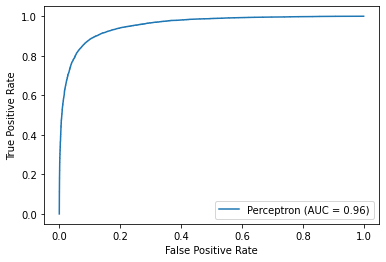

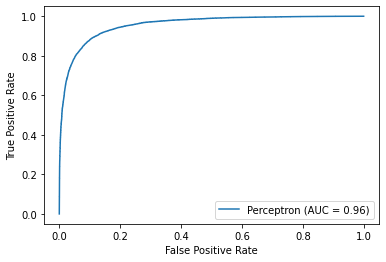

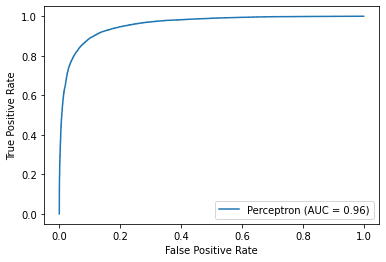

In [ ]:
metrics.plot_roc_curve(modelo1, X1_test, y1_test)
metrics.plot_roc_curve(modelo2, X2_test, y2_test)
metrics.plot_roc_curve(modelo2, X3_test, y3_test)
plt.show()  

# Modelo 1 Aplicado a otras muestras


In [3]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos//modeloPerceptron_m1.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator Perceptron from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [4]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 5.44 s, sys: 230 ms, total: 5.67 s
Wall time: 6.42 s
CPU times: user 5.6 ms, sys: 3.99 ms, total: 9.58 ms
Wall time: 628 ms
CPU times: user 5.64 s, sys: 178 ms, total: 5.81 s
Wall time: 6.57 s
CPU times: user 6.25 ms, sys: 2 ms, total: 8.25 ms
Wall time: 699 ms
CPU times: user 5.81 s, sys: 195 ms, total: 6.01 s
Wall time: 6.65 s
CPU times: user 8.34 ms, sys: 1 ms, total: 9.34 ms
Wall time: 678 ms


In [5]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Perceptron was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 1.4 s, sys: 16 ms, total: 1.42 s
Wall time: 1.42 s
CPU times: user 1.73 s, sys: 37.6 ms, total: 1.77 s
Wall time: 1.76 s
CPU times: user 1.48 s, sys: 39 ms, total: 1.52 s
Wall time: 1.51 s


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.857 | 0.86 | 0.862
precision: 0.858 | 0.861 | 0.863 
recall: 0.87 | 0.873 | 0.875  
f1: 0.857 | 0.86 | 0.862  


# Modelo 2 Aplicado a otras muestras


In [7]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos//modeloPerceptron_m2.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator Perceptron from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [8]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Perceptron was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 507 ms, sys: 3.79 ms, total: 511 ms
Wall time: 507 ms
CPU times: user 501 ms, sys: 5.37 ms, total: 506 ms
Wall time: 502 ms
CPU times: user 492 ms, sys: 1.5 ms, total: 493 ms
Wall time: 492 ms


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.79 | 0.793 | 0.79
precision: 0.858 | 0.86 | 0.859 
recall: 0.746 | 0.75 | 0.745  
f1: 0.79 | 0.793 | 0.79  


# Modelo 3 Aplicado a otras muestras


In [10]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos//modeloPerceptron_m3.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator Perceptron from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [11]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Perceptron was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 534 ms, sys: 1.57 ms, total: 536 ms
Wall time: 533 ms
CPU times: user 502 ms, sys: 1.69 ms, total: 504 ms
Wall time: 502 ms
CPU times: user 493 ms, sys: 639 µs, total: 494 ms
Wall time: 492 ms


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.858 | 0.857 | 0.854
precision: 0.861 | 0.861 | 0.857 
recall: 0.873 | 0.872 | 0.869  
f1: 0.858 | 0.857 | 0.854  
